PUC Minas - Pontifícia Universidade Católica de Minas Gerais

Pós-Graduação em Ciência de Dados e Big Data

TRABALHO DE CONCLUSÃO DE CURSO

Aluna: Andréia Araújo de Assis

Matrícula: 1134734

Este notebook é referente aos códigos elaborados em Python e utilizados no Trabalho de Conclusão de Curso em Ciência de Dados e Big Data da Pós-Graduação da PUC Minas, especificamente para a criação e interpretação dos modelos de Machine Learning.

In [ ]:
#Carregamento de bibliotecas gerais
import pandas as pd 
import numpy as np
import seaborn as sb
import shutil
import os
import io
import datetime
from datetime import datetime
import matplotlib.pyplot as pl
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
#Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
#Configurando os plots para serem exibidos diretamente no notebook
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importação do modelo de ML do dataset indices_acidentes.CSV
datatran_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran_mg.csv',  sep=';', decimal=',', encoding = 'cp1252')
datatran_mg.fillna(0, inplace=True)
datatran_mg = datatran_mg[datatran_mg.br !=0]
datatran_mg.isnull().sum()
from numpy import int64
datatran_mg['id'] = datatran_mg.id.astype('int64')
datatran_mg['br'] = datatran_mg.br.astype('int64')
datatran_mg['km'] = datatran_mg.km.astype('int64')
datatran_mg['uso_solo'] = datatran_mg.uso_solo.astype('string')
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
datatran_mg['uso_solo'].replace(['Sim'], 'Urbano', inplace=True)
datatran_mg['uso_solo'].replace(['Não'], 'Rural', inplace=True)
datatran_mg.drop(columns = ['regional', 'delegacia', 'uop'], axis=1, inplace=True)
datatran_mg.reset_index(inplace=True)
datatran_mg.drop(columns=['index'], axis=1, inplace=True)
datatran_mg.to_csv('/content/drive/My Drive/PUC_TCC/datatran_mg2.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

#Aprendizado Geral

In [ ]:
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
class_acid = pd.DataFrame(datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['br'], datatran_mg['causa_acidente'], datatran_mg['classificacao_acidente']]).agg({'id': 'count'}).reset_index())
class_acid.rename(columns={'causa_acidente':'Causa'}, inplace=True)
class_acid.rename(columns={'br':'BR'}, inplace=True)
class_acid.rename(columns={'id':'Acidentes'}, inplace=True)
class_acid['Sem_Vitimas'] = '0'
class_acid['Com_Vitimas_Feridas'] = '0'
class_acid['Com_Vitimas_Fatais'] = '0'
class_acid['Causa'] = class_acid.Causa.astype('object')
class_acid['BR'] = class_acid.BR.astype('object')
class_acid['Sem_Vitimas'] = class_acid.Sem_Vitimas.astype('int64')
class_acid['Com_Vitimas_Feridas'] = class_acid.Com_Vitimas_Feridas.astype('int64')
class_acid['Com_Vitimas_Fatais'] = class_acid.Com_Vitimas_Fatais.astype('int64')
class_acid.loc[class_acid['classificacao_acidente'] == 'Com Vítimas Fatais', 'Com_Vitimas_Fatais'] = class_acid['Acidentes']
class_acid.loc[class_acid['classificacao_acidente'] == 'Com Vítimas Feridas', 'Com_Vitimas_Feridas'] = class_acid['Acidentes']
class_acid.loc[class_acid['classificacao_acidente'] == 'Sem Vítimas', 'Sem_Vitimas'] = class_acid['Acidentes']
class_acid.drop(columns=['classificacao_acidente'], axis=1, inplace=True)
class_acid.drop(columns=['Acidentes'], axis=1, inplace=True)
class_acidentes = pd.DataFrame(class_acid.groupby([class_acid['Ano'], class_acid['Causa'], class_acid['BR']]).agg({'Sem_Vitimas' : 'sum', 'Com_Vitimas_Feridas' : 'sum', 'Com_Vitimas_Fatais' : 'sum'}).reset_index())
#class_acidentes.head(10)

# #Extensões por trecho de BR
tab_snv_2017_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2017_mg.csv', sep=';', decimal=',', encoding = 'utf_8')
tab_snv_2018_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2018_mg.csv', sep=';', decimal=',', encoding = 'utf_8')
tab_snv_2019_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2019_mg.csv', sep=';', decimal=',', encoding = 'utf_8')
tab_snv_2020_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2020_mg.csv', sep=';', decimal=',', encoding = 'utf_8')
tab_snv_2021_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2021_mg.csv', sep=';', decimal=',', encoding = 'utf_8')

#Extensões por BR
tab_snv_2017_mg_br = pd.DataFrame(tab_snv_2017_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2018_mg_br = pd.DataFrame(tab_snv_2018_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2019_mg_br = pd.DataFrame(tab_snv_2019_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2020_mg_br = pd.DataFrame(tab_snv_2020_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2021_mg_br = pd.DataFrame(tab_snv_2020_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2017_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2017_mg_br['Ano'] = '2017'
tab_snv_2018_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2018_mg_br['Ano'] = '2018'
tab_snv_2019_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2019_mg_br['Ano'] = '2019'
tab_snv_2020_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2020_mg_br['Ano'] = '2020'
tab_snv_2021_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2021_mg_br['Ano'] = '2021'

#juntando as bases
tab_snv_mg_br = pd.concat([tab_snv_2017_mg_br,tab_snv_2018_mg_br,tab_snv_2019_mg_br,tab_snv_2020_mg_br, tab_snv_2021_mg_br], join="inner")
tab_snv_mg_br.set_index('Ano', inplace = True)

#Excluindo BRs sem acidentes registrados
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.drop(tab_snv_mg_br.index[[0,4,5,9,11,13,15,16,21,22,24,25,26,27,28,29,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46]], inplace=True)
tab_snv_mg_br.set_index('Ano', inplace = True)
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.drop(tab_snv_mg_br.index[[19,20,24,26,28,30,31,36,37,39,40,41,42,43,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61]], inplace=True)
tab_snv_mg_br.set_index('Ano', inplace = True)
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.drop(tab_snv_mg_br.index[[37,40,42,46,47,52,53,55,56,57,58,59,60,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77]], inplace=True)
tab_snv_mg_br.set_index('Ano', inplace = True)
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.drop(tab_snv_mg_br.index[[53,54,55,58,60,64,70,71,73,74,75,76,77,78,79,80,81,83,84,85,86,87,88,89,90,91,92,93,94,95]], inplace=True)
tab_snv_mg_br.set_index('Ano', inplace = True)
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.to_csv('/content/drive/My Drive/PUC_TCC/tab_snv_mg_br.csv', index=False)


#Preparação para a geração dos indicadores
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
data_tab_mg = pd.DataFrame(datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['br'], datatran_mg['causa_acidente']]).agg({'id': 'count', 'feridos' : 'sum', 'mortos' : 'sum', 'pessoas' : 'sum'}).reset_index())
data_tab_mg.rename(columns={'id':'Acidentes'}, inplace=True)
data_tab_mg.rename(columns={'feridos':'Feridos'}, inplace=True)
data_tab_mg.rename(columns={'mortos':'Mortes'}, inplace=True)
data_tab_mg.rename(columns={'pessoas':'Envolvidos'}, inplace=True)
data_tab_mg.rename(columns={'br':'BR'}, inplace=True)
data_tab_mg.rename(columns={'causa_acidente':'Causa'}, inplace=True)
data_tab_mg['BR'] = data_tab_mg.BR.astype('object')
data_tab_mg['Causa'] = data_tab_mg.Causa.astype('object')
tab_snv_mg_br.drop(columns=['BR'], axis=1, inplace=True)
data_tab_mg.drop(columns=['Ano'], axis=1, inplace=True)
data_indices = pd.DataFrame(pd.concat([tab_snv_mg_br, data_tab_mg], axis=1, join="inner")).reset_index()
data_indices.drop(columns=['index'], axis=1, inplace=True)

#Gerando os indicadores dos dados de 2017 
data_2017 = data_indices.loc[(data_indices['Ano'] == "2017")]
data_2017 = data_2017.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes']).reset_index()
data_2017.drop(columns=['index'], axis=1, inplace=True)
data_2017.to_csv('/content/drive/My Drive/PUC_TCC/data_2017Ml.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

#Gerando os indicadores dos dados de 2018
data_2018 = data_indices.loc[(data_indices['Ano'] == "2018")]
data_2018 = data_2018.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes']).reset_index()
data_2018.drop(columns=['index'], axis=1, inplace=True)
data_2018.to_csv('/content/drive/My Drive/PUC_TCC/data_2018Ml.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

#Gerando os indicadores dos dados de 2019 
data_2019 = data_indices.loc[(data_indices['Ano'] == "2019")]
data_2019 = data_2019.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes']).reset_index()
data_2019.drop(columns=['index'], axis=1, inplace=True)
data_2019.to_csv('/content/drive/My Drive/PUC_TCC/data_2019Ml.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

#Gerando os indicadores dos dados de 2020
data_2020 = data_indices.loc[(data_indices['Ano'] == "2020")]
data_2020 = data_2020.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes']).reset_index()
data_2020.drop(columns=['index'], axis=1, inplace=True)
data_2020.to_csv('/content/drive/My Drive/PUC_TCC/data_2020Ml.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

#Gerando os indicadores dos dados de 2021
data_2021 = data_indices.loc[(data_indices['Ano'] == "2021")]
data_2021 = data_2021.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes']).reset_index()
data_2021.drop(columns=['index'], axis=1, inplace=True)
data_2021.to_csv('/content/drive/My Drive/PUC_TCC/data_2021Ml.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

#Consolidando os indicadores de acidentalidade em um único dataframe
indices_data = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021], sort = False).reset_index()
indices_data.drop(columns=['index'], axis=1, inplace=True)
class_acidentes.drop(columns=['Ano'], axis=1, inplace=True)
class_acidentes.drop(columns=['BR'], axis=1, inplace=True)
class_acidentes.drop(columns=['Causa'], axis=1, inplace=True)
df = pd.concat([indices_data, class_acidentes], axis=1, sort = False).reset_index()
df.drop(columns=['index'], axis=1, inplace=True)
df.to_csv('/content/drive/My Drive/PUC_TCC/indices_acidentesMl.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
df.drop(columns = ['Sem_Vitimas', 'Com_Vitimas_Feridas', 'Com_Vitimas_Fatais'], axis=1, inplace=True)

In [ ]:
df = df.dropna(how='all')

In [ ]:
df

Ano                                              Causa   BR  Extensao  Acidentes  Envolvidos  Feridos  Mortes
0    2017                                   Animais na Pista   40    893.90       44.0        84.0     42.0     0.0
1    2017            Avarias e/ou desgaste excessivo no pneu   40    269.80       54.0       101.0     60.0     4.0
2    2017             Carga excessiva e/ou mal acondicionada   40    818.10       19.0        28.0      5.0     0.0
3    2017                                  Condutor Dormindo   40    834.70      113.0       237.0    122.0     9.0
4    2017                        Defeito Mecânico no Veículo   40    726.80      140.0       325.0    133.0     1.0
5    2017                                     Defeito na Via   40    239.90       22.0        41.0     20.0     1.0
6    2017  Desobediência às normas de trânsito pelo condutor   40   1015.70      103.0       304.0    132.0    12.0
7    2017                       Falta de Atenção do Pedestre   40   1082.90       72.0       184.0     63.0    16.0
8    2017                        Falta de Atenção à Condução   40    534.70      810.0      1996.0    884.0    60.0
9    2017                              Fenômenos da Natureza   40    774.50       11.0        23.0      9.0     1.0
10   2017                Ingestão de Substâncias Psicoativas   40    291.90        1.0         3.0      0.0     1.0
11   2017                                 Ingestão de Álcool   40    287.00      105.0       294.0    127.0     5.0
12   2017                                         Mal Súbito   40    869.90       55.0        88.0     50.0     3.0
13   2017                 Não guardar distância de segurança   40   1083.90      140.0       420.0    171.0     0.0
14   2017           Objeto estático sobre o leito carroçável   40    306.20       18.0        46.0     21.0     0.0
15   2017                                 Pista Escorregadia   40    217.60      128.0       232.0    100.0     2.0
16   2018                          Restrição de Visibilidade   40   2001.70       25.0        51.0     26.0     3.0
17   2018      Sinalização da via insuficiente ou inadequada   40   1976.30        7.0        12.0      5.0     1.0
18   2018                             Ultrapassagem Indevida   40   1239.70       28.0        77.0     35.0     3.0
19   2018                            Velocidade Incompatível   40   1503.70      479.0       933.0    489.0    23.0
20   2018                                   Animais na Pista   50   1372.50        5.0        11.0      5.0     0.0
21   2018            Avarias e/ou desgaste excessivo no pneu   50    629.40       26.0        45.0     34.0     0.0
22   2018             Carga excessiva e/ou mal acondicionada   50    674.60        7.0         8.0      1.0     0.0
23   2018                                  Condutor Dormindo   50   4753.50       63.0       137.0     56.0     1.0
24   2018                        Defeito Mecânico no Veículo   50   1907.90       55.0        83.0     31.0     1.0
25   2018                                     Defeito na Via   50   3616.80        6.0         8.0      6.0     0.0
26   2018  Deficiência ou não Acionamento do Sistema de I...   50    526.10        3.0         4.0      1.0     0.0
27   2018  Desobediência às normas de trânsito pelo condutor   50    344.40       20.0        38.0     17.0     0.0
28   2018                       Falta de Atenção do Pedestre   50    822.90        8.0        18.0      6.0     2.0
29   2018                        Falta de Atenção à Condução   50   3276.90      251.0       510.0    228.0     2.0
30   2018                              Fenômenos da Natureza   50   2292.80        4.0         4.0      1.0     0.0
31   2018                Ingestão de Substâncias Psicoativas   50   2383.10        1.0         1.0      0.0     0.0
32   2018                                 Ingestão de Álcool   50    636.30       38.0        88.0     36.0     1.0
33   2018                                         Mal Súbito  

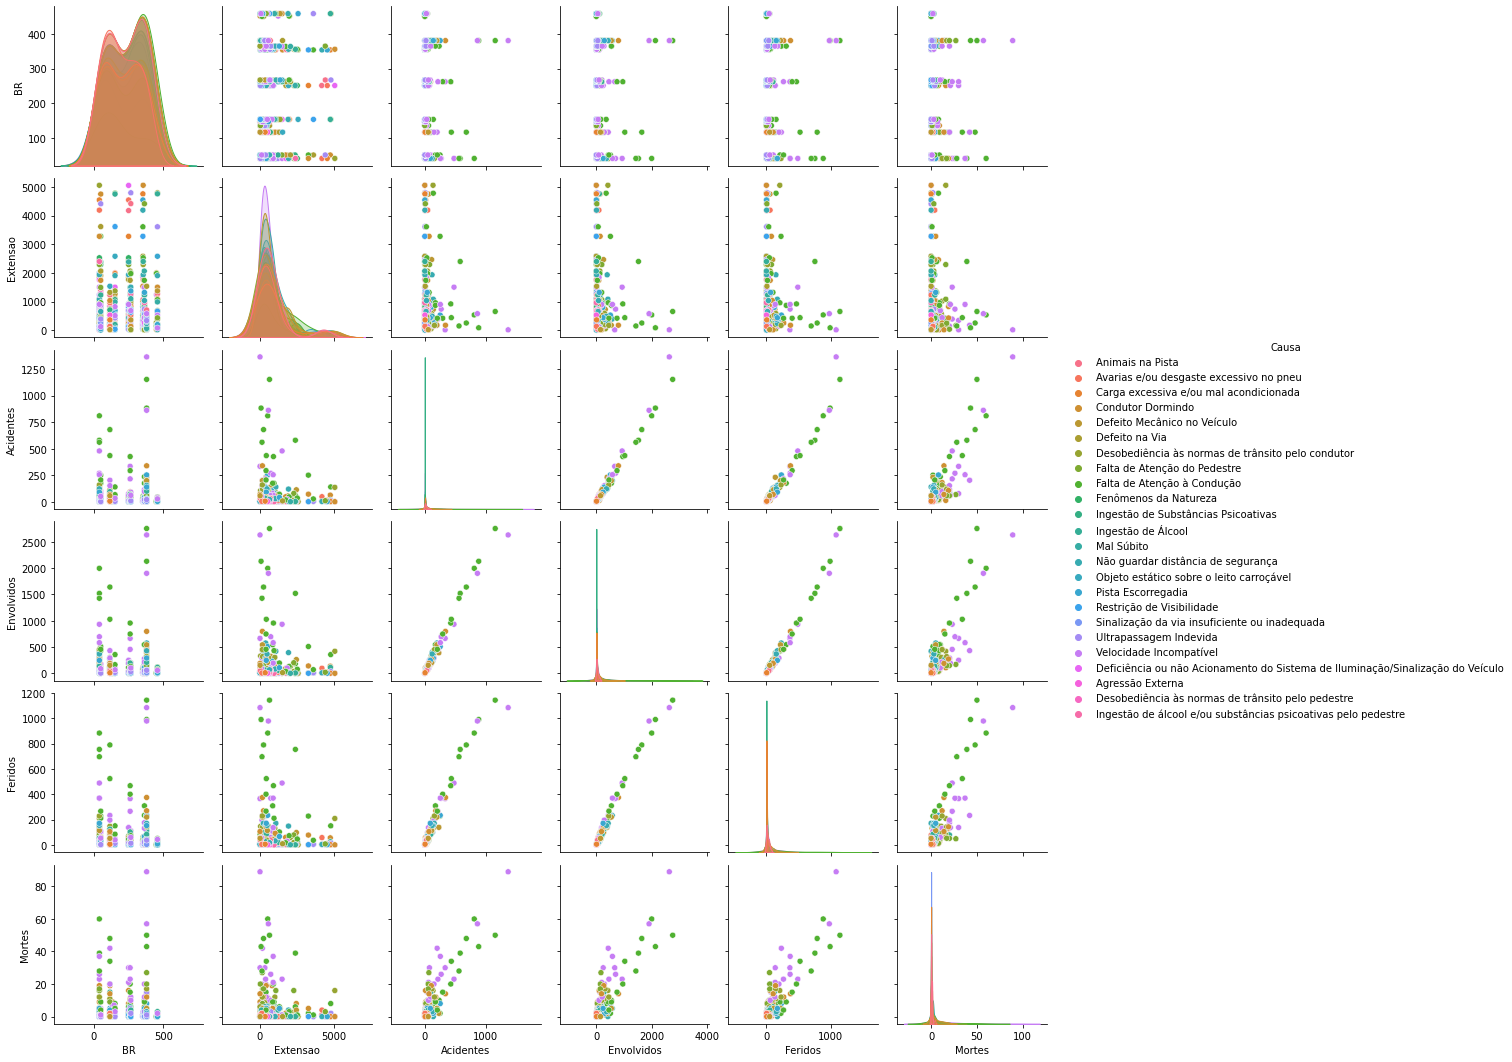

In [ ]:
sb.pairplot(df,hue='Causa')

In [ ]:
sb.pairplot(df)

In [ ]:
X = np.array(df.drop('Causa', 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
X

array([['2017', 40, 893.9, ..., 84.0, 42.0, 0.0],
       ['2017', 40, 269.8, ..., 101.0, 60.0, 4.0],
       ['2017', 40, 818.1, ..., 28.0, 5.0, 0.0],
       ...,
       ['2021', 116, 361.1, ..., 12.0, 6.0, 0.0],
       ['2021', 116, 14.2, ..., 189.0, 106.0, 14.0],
       ['2021', 116, 20.8, ..., 153.0, 52.0, 0.0]], dtype=object)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeans.labels_

array([2, 0, 2, 2, 2, 0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2,
       2, 4, 1, 4, 0, 0, 2, 4, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 4, 2, 1, 1, 2,
       4, 0, 0, 2, 4, 4, 4, 1, 1, 1, 4, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 4, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 2,
       2, 1, 2, 2, 4, 2, 2, 4, 2, 1, 1, 2, 4, 0, 0, 2, 4, 4, 4, 1, 1, 1,
       4, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,

In [ ]:
#COMPARANDO AS CLASSES CRIADAS COM AS CLASSES EXISTENTES
df['K-classes'] = kmeans.labels_

In [ ]:
df

Ano                                              Causa   BR  Extensao  Acidentes  Envolvidos  Feridos  Mortes  K-classes
0    2017                                   Animais na Pista   40    893.90       44.0        84.0     42.0     0.0          2
1    2017            Avarias e/ou desgaste excessivo no pneu   40    269.80       54.0       101.0     60.0     4.0          0
2    2017             Carga excessiva e/ou mal acondicionada   40    818.10       19.0        28.0      5.0     0.0          2
3    2017                                  Condutor Dormindo   40    834.70      113.0       237.0    122.0     9.0          2
4    2017                        Defeito Mecânico no Veículo   40    726.80      140.0       325.0    133.0     1.0          2
5    2017                                     Defeito na Via   40    239.90       22.0        41.0     20.0     1.0          0
6    2017  Desobediência às normas de trânsito pelo condutor   40   1015.70      103.0       304.0    132.0    12.0          2
7    2017                       Falta de Atenção do Pedestre   40   1082.90       72.0       184.0     63.0    16.0          2
8    2017                        Falta de Atenção à Condução   40    534.70      810.0      1996.0    884.0    60.0          3
9    2017                              Fenômenos da Natureza   40    774.50       11.0        23.0      9.0     1.0          2
10   2017                Ingestão de Substâncias Psicoativas   40    291.90        1.0         3.0      0.0     1.0          0
11   2017                                 Ingestão de Álcool   40    287.00      105.0       294.0    127.0     5.0          0
12   2017                                         Mal Súbito   40    869.90       55.0        88.0     50.0     3.0          2
13   2017                 Não guardar distância de segurança   40   1083.90      140.0       420.0    171.0     0.0          2
14   2017           Objeto estático sobre o leito carroçável   40    306.20       18.0        46.0     21.0     0.0          0
15   2017                                 Pista Escorregadia   40    217.60      128.0       232.0    100.0     2.0          0
16   2018                          Restrição de Visibilidade   40   2001.70       25.0        51.0     26.0     3.0          1
17   2018      Sinalização da via insuficiente ou inadequada   40   1976.30        7.0        12.0      5.0     1.0          1
18   2018                             Ultrapassagem Indevida   40   1239.70       28.0        77.0     35.0     3.0          2
19   2018                            Velocidade Incompatível   40   1503.70      479.0       933.0    489.0    23.0          1
20   2018                                   Animais na Pista   50   1372.50        5.0        11.0      5.0     0.0          2
21   2018            Avarias e/ou desgaste excessivo no pneu   50    629.40       26.0        45.0     34.0     0.0          2
22   2018             Carga excessiva e/ou mal acondicionada   50    674.60        7.0         8.0      1.0     0.0          2
23   2018                                  Condutor Dormindo   50   4753.50       63.0       137.0     56.0     1.0          4
24   2018                        Defeito Mecânico no Veículo   50   1907.90       55.0        83.0     31.0     1.0          1
25   2018                                     Defeito na Via   50   3616.80        6.0         8.0      6.0     0.0          4
26   2018  Deficiência ou não Acionamento do Sistema de I...   50    526.10        3.0         4.0      1.0     0.0          0
27   2018  Desobediência às normas de trânsito pelo condutor   50    344.40       20.0        38.0     17.0     0.0          0
28   2018                       Falta de Atenção do Pedestre   50    822.90        8.0        18.0      6.0     2.0          2
29   2018                        Falta de Atenção à Condução   50   3276.90      251.0       510.0    228.0     2.0          4
30   2018                              Fenômenos da Natureza   50   2

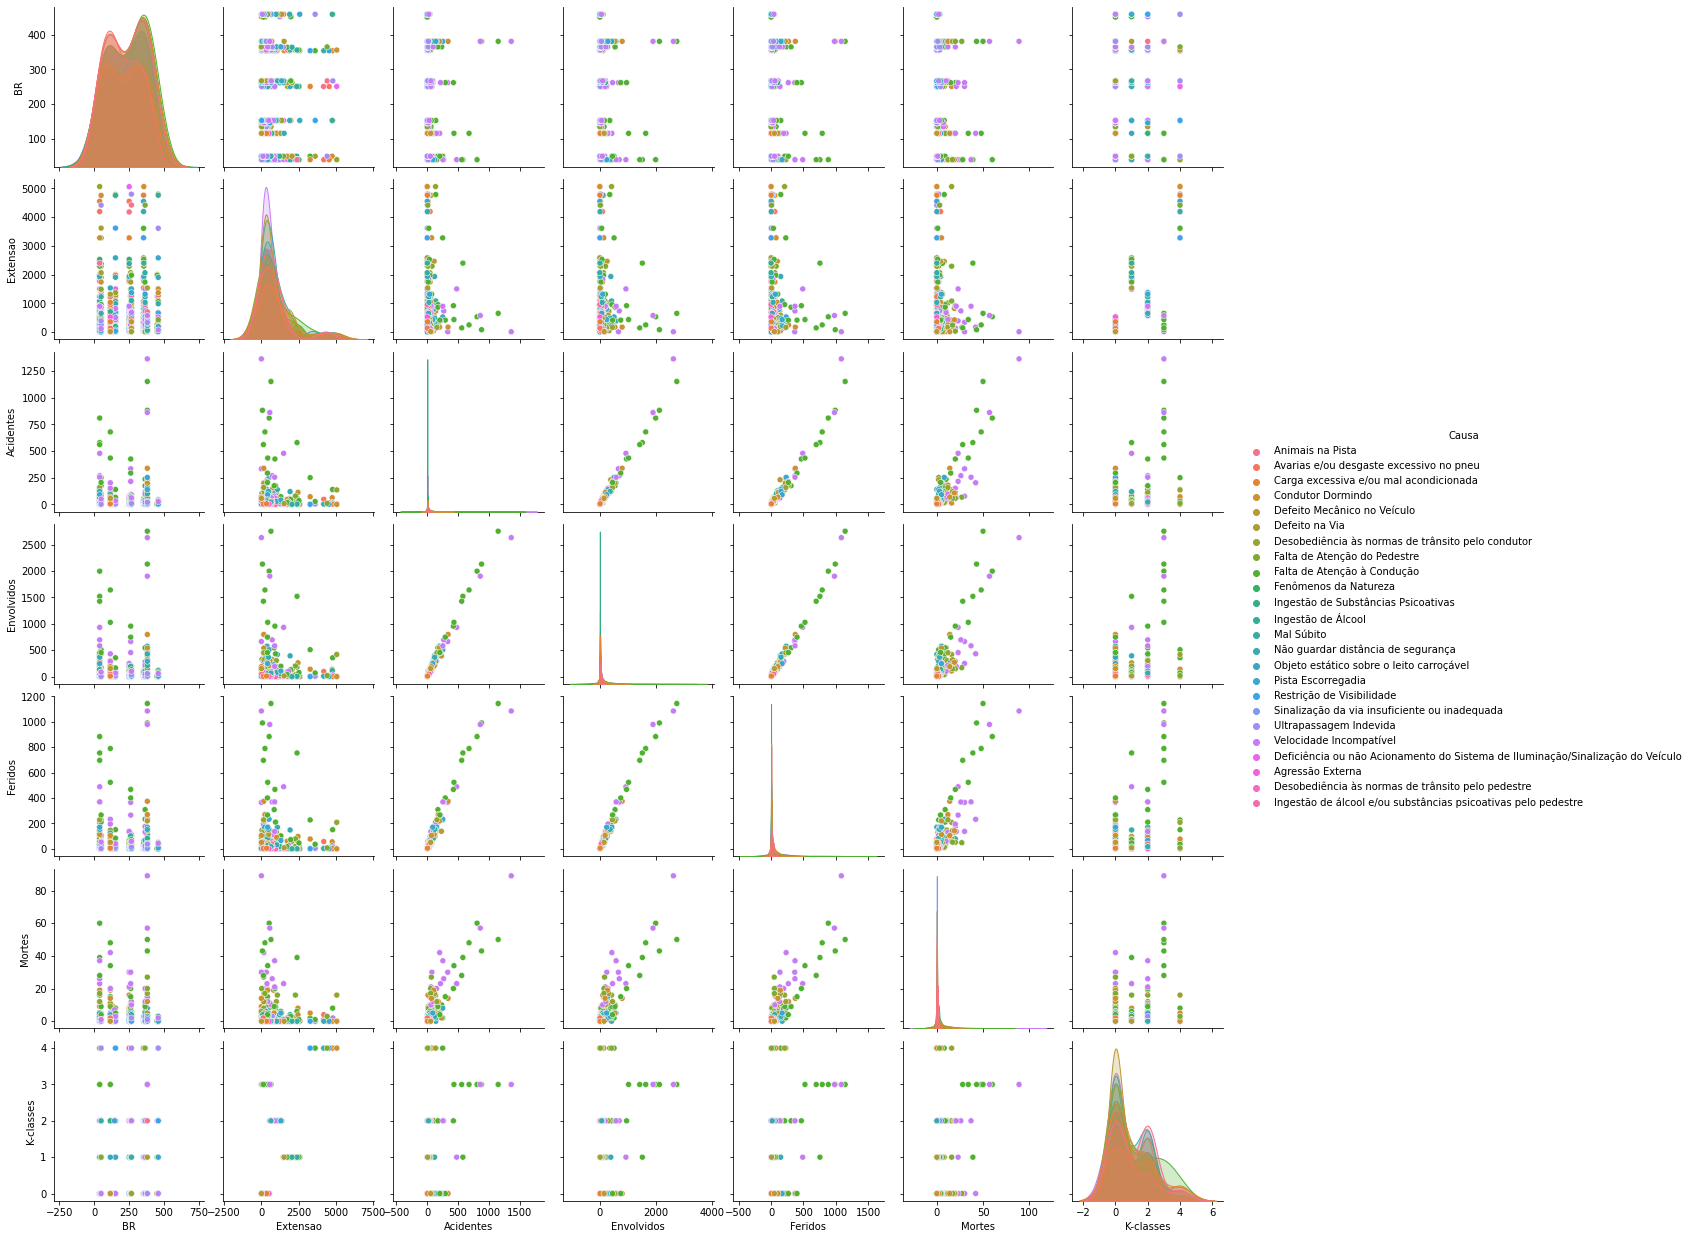

In [ ]:
sb.pairplot(df,hue='Causa')

In [ ]:
sb.pairplot(df,'K-classes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


#Aprendizagem por Ano - 2017

In [ ]:
sb.pairplot(data_2017,hue='Causa')

In [ ]:
sb.pairplot(data_2017)

In [ ]:
A17 = np.array(data_2017.drop('Causa', 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
A17

array([['2017', 40, 893.9, 44, 84, 42, 0],
       ['2017', 40, 269.8, 54, 101, 60, 4],
       ['2017', 40, 818.1, 19, 28, 5, 0],
       ['2017', 40, 834.7, 113, 237, 122, 9],
       ['2017', 40, 726.8, 140, 325, 133, 1],
       ['2017', 40, 239.9, 22, 41, 20, 1],
       ['2017', 40, 1015.7, 103, 304, 132, 12],
       ['2017', 40, 1082.9, 72, 184, 63, 16],
       ['2017', 40, 534.7, 810, 1996, 884, 60],
       ['2017', 40, 774.5, 11, 23, 9, 1],
       ['2017', 40, 291.9, 1, 3, 0, 1],
       ['2017', 40, 287.0, 105, 294, 127, 5],
       ['2017', 40, 869.9, 55, 88, 50, 3],
       ['2017', 40, 1083.9, 140, 420, 171, 0],
       ['2017', 40, 306.2, 18, 46, 21, 0],
       ['2017', 40, 217.6, 128, 232, 100, 2]], dtype=object)

In [ ]:
kmeansAno2017 = KMeans(n_clusters=5, random_state=0)
kmeansAno2017.fit(A17)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeansAno2017.labels_

array([4, 0, 4, 1, 1, 0, 3, 3, 2, 4, 0, 0, 4, 3, 0, 0], dtype=int32)

In [ ]:
#COMPARANDO AS CLASSES CRIADAS COM AS CLASSES EXISTENTES
data_2017['K-classes'] = kmeansAno2017.labels_

In [ ]:
data_2017

Ano                                              Causa  BR  Extensao  Acidentes  Envolvidos  Feridos  Mortes  K-classes
0   2017                                   Animais na Pista  40     893.9         44          84       42       0          4
1   2017            Avarias e/ou desgaste excessivo no pneu  40     269.8         54         101       60       4          0
2   2017             Carga excessiva e/ou mal acondicionada  40     818.1         19          28        5       0          4
3   2017                                  Condutor Dormindo  40     834.7        113         237      122       9          1
4   2017                        Defeito Mecânico no Veículo  40     726.8        140         325      133       1          1
5   2017                                     Defeito na Via  40     239.9         22          41       20       1          0
6   2017  Desobediência às normas de trânsito pelo condutor  40    1015.7        103         304      132      12          3
7   2017                       Falta de Atenção do Pedestre  40    1082.9         72         184       63      16          3
8   2017                        Falta de Atenção à Condução  40     534.7        810        1996      884      60          2
9   2017                              Fenômenos da Natureza  40     774.5         11          23        9       1          4
10  2017                Ingestão de Substâncias Psicoativas  40     291.9          1           3        0       1          0
11  2017                                 Ingestão de Álcool  40     287.0        105         294      127       5          0
12  2017                                         Mal Súbito  40     869.9         55          88       50       3          4
13  2017                 Não guardar distância de segurança  40    1083.9        140         420      171       0          3
14  2017           Objeto estático sobre o leito carroçável  40     306.2         18          46       21       0          0
15  2017                                 Pista Escorregadia  40     217.6        128         232      100       2          0

In [ ]:
sb.pairplot(data_2017,'K-classes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


#Aprendizagem por Ano - 2018

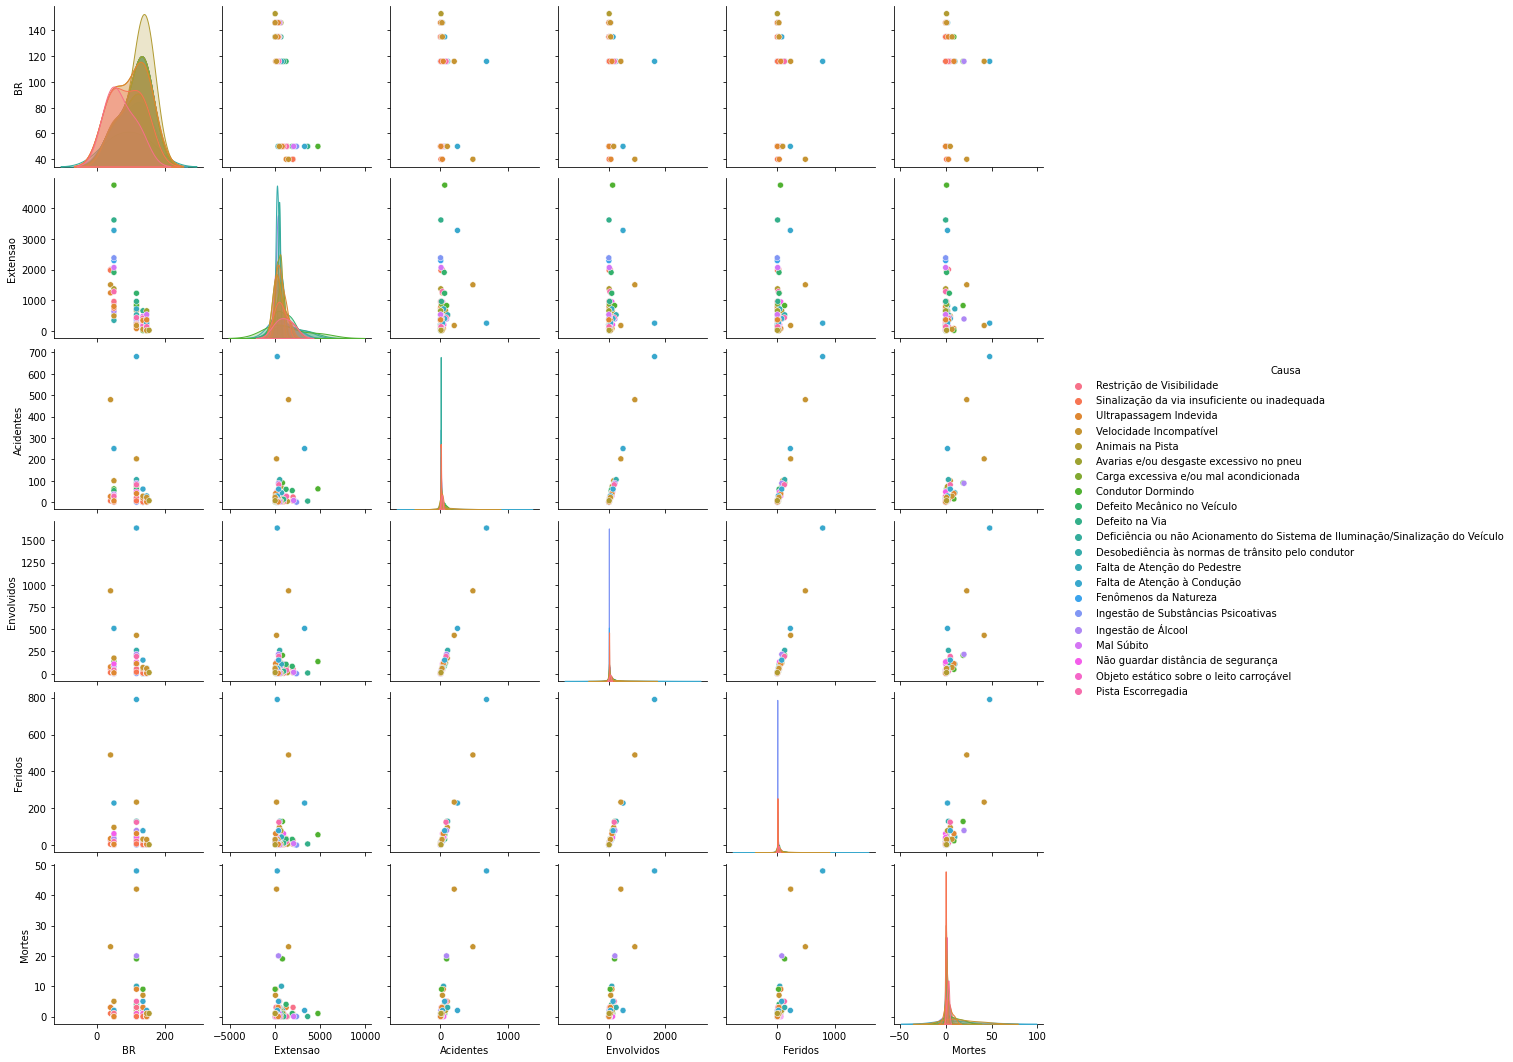

In [ ]:
sb.pairplot(data_2018,hue='Causa')

In [ ]:
sb.pairplot(data_2018)

In [ ]:
A18 = np.array(data_2018.drop('Causa', 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
A18

array([['2018', 40, 2001.7, 25, 51, 26, 3],
       ['2018', 40, 1976.3, 7, 12, 5, 1],
       ['2018', 40, 1239.7, 28, 77, 35, 3],
       ['2018', 40, 1503.7, 479, 933, 489, 23],
       ['2018', 50, 1372.5, 5, 11, 5, 0],
       ['2018', 50, 629.4, 26, 45, 34, 0],
       ['2018', 50, 674.6, 7, 8, 1, 0],
       ['2018', 50, 4753.5, 63, 137, 56, 1],
       ['2018', 50, 1907.9, 55, 83, 31, 1],
       ['2018', 50, 3616.8, 6, 8, 6, 0],
       ['2018', 50, 526.1, 3, 4, 1, 0],
       ['2018', 50, 344.4, 20, 38, 17, 0],
       ['2018', 50, 822.9, 8, 18, 6, 2],
       ['2018', 50, 3276.9, 251, 510, 228, 2],
       ['2018', 50, 2292.8, 4, 4, 1, 0],
       ['2018', 50, 2383.1, 1, 1, 0, 0],
       ['2018', 50, 636.3, 38, 88, 36, 1],
       ['2018', 50, 2066.3, 9, 16, 8, 0],
       ['2018', 50, 944.5, 31, 111, 62, 0],
       ['2018', 50, 918.8, 5, 11, 4, 0],
       ['2018', 50, 1278.9, 28, 40, 19, 0],
       ['2018', 50, 958.7, 3, 5, 2, 1],
       ['2018', 50, 742.8, 2, 9, 2, 0],
       ['2018', 50, 

In [ ]:
kmeansAno2018 = KMeans(n_clusters=5, random_state=0)
kmeansAno2018.fit(A18)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeansAno2018.labels_

array([1, 1, 2, 4, 2, 2, 2, 3, 1, 3, 0, 0, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
#COMPARANDO AS CLASSES CRIADAS COM AS CLASSES EXISTENTES
data_2018['K-classes'] = kmeansAno2018.labels_

In [ ]:
data_2018

Ano                                              Causa   BR  Extensao  Acidentes  Envolvidos  Feridos  Mortes  K-classes
0   2018                          Restrição de Visibilidade   40    2001.7         25          51       26       3          1
1   2018      Sinalização da via insuficiente ou inadequada   40    1976.3          7          12        5       1          1
2   2018                             Ultrapassagem Indevida   40    1239.7         28          77       35       3          2
3   2018                            Velocidade Incompatível   40    1503.7        479         933      489      23          4
4   2018                                   Animais na Pista   50    1372.5          5          11        5       0          2
5   2018            Avarias e/ou desgaste excessivo no pneu   50     629.4         26          45       34       0          2
6   2018             Carga excessiva e/ou mal acondicionada   50     674.6          7           8        1       0          2
7   2018                                  Condutor Dormindo   50    4753.5         63         137       56       1          3
8   2018                        Defeito Mecânico no Veículo   50    1907.9         55          83       31       1          1
9   2018                                     Defeito na Via   50    3616.8          6           8        6       0          3
10  2018  Deficiência ou não Acionamento do Sistema de I...   50     526.1          3           4        1       0          0
11  2018  Desobediência às normas de trânsito pelo condutor   50     344.4         20          38       17       0          0
12  2018                       Falta de Atenção do Pedestre   50     822.9          8          18        6       2          2
13  2018                        Falta de Atenção à Condução   50    3276.9        251         510      228       2          3
14  2018                              Fenômenos da Natureza   50    2292.8          4           4        1       0          1
15  2018                Ingestão de Substâncias Psicoativas   50    2383.1          1           1        0       0          1
16  2018                                 Ingestão de Álcool   50     636.3         38          88       36       1          2
17  2018                                         Mal Súbito   50    2066.3          9          16        8       0          1
18  2018                 Não guardar distância de segurança   50     944.5         31         111       62       0          2
19  2018           Objeto estático sobre o leito carroçável   50     918.8          5          11        4       0          2
20  2018                                 Pista Escorregadia   50    1278.9         28          40       19       0          2
21  2018                          Restrição de Visibilidade   50     958.7          3           5        2       1          2
22  2018      Sinalização da via insuficiente ou inadequada   50     742.8          2           9        2       0          2
23  2018                             Ultrapassagem Indevida   50     799.2          7          10        4       0          2
24  2018                            Velocidade Incompatível   50     488.5        101         176       96       5          0
25  2018                                   Animais na Pista  116     657.4         74         121       78       2          2
26  2018            Avarias e/ou desgaste excessivo no pneu  116     259.3         11          19       13       0          0
27  2018             Carga excessiva e/ou mal acondicionada  116     869.9         16          21        8       1          2
28  2018                                  Condutor Dormindo  116     826.3         91         207      128      19          2
29  2018                        Defeito Mecânico no Veículo  116    1228.0         61         106       32       4          2
30  2018                                     Defeito na Via  116     962.1         14          28  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


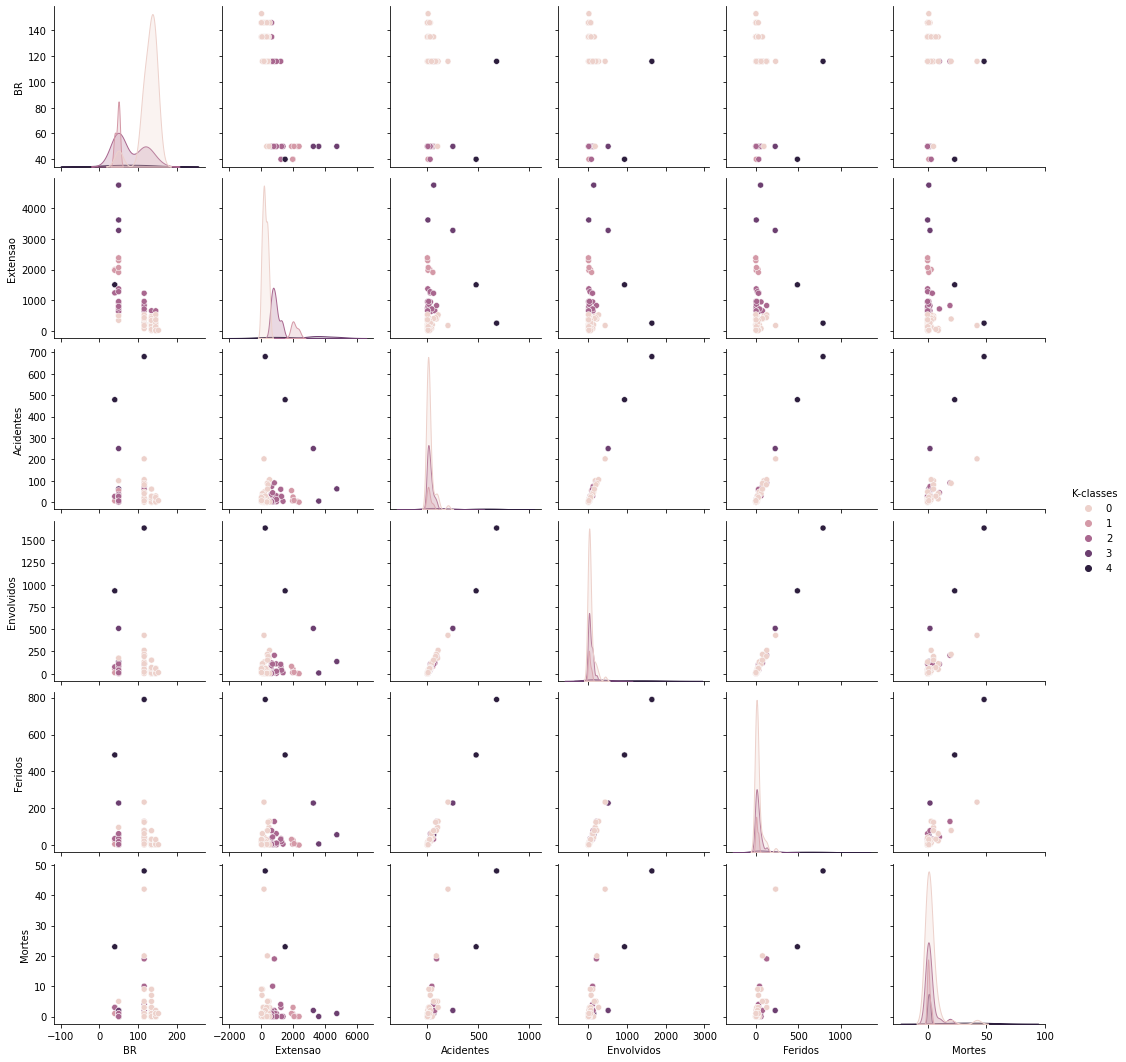

In [ ]:
sb.pairplot(data_2018,'K-classes')

#Aprendizagem por Ano - 2019

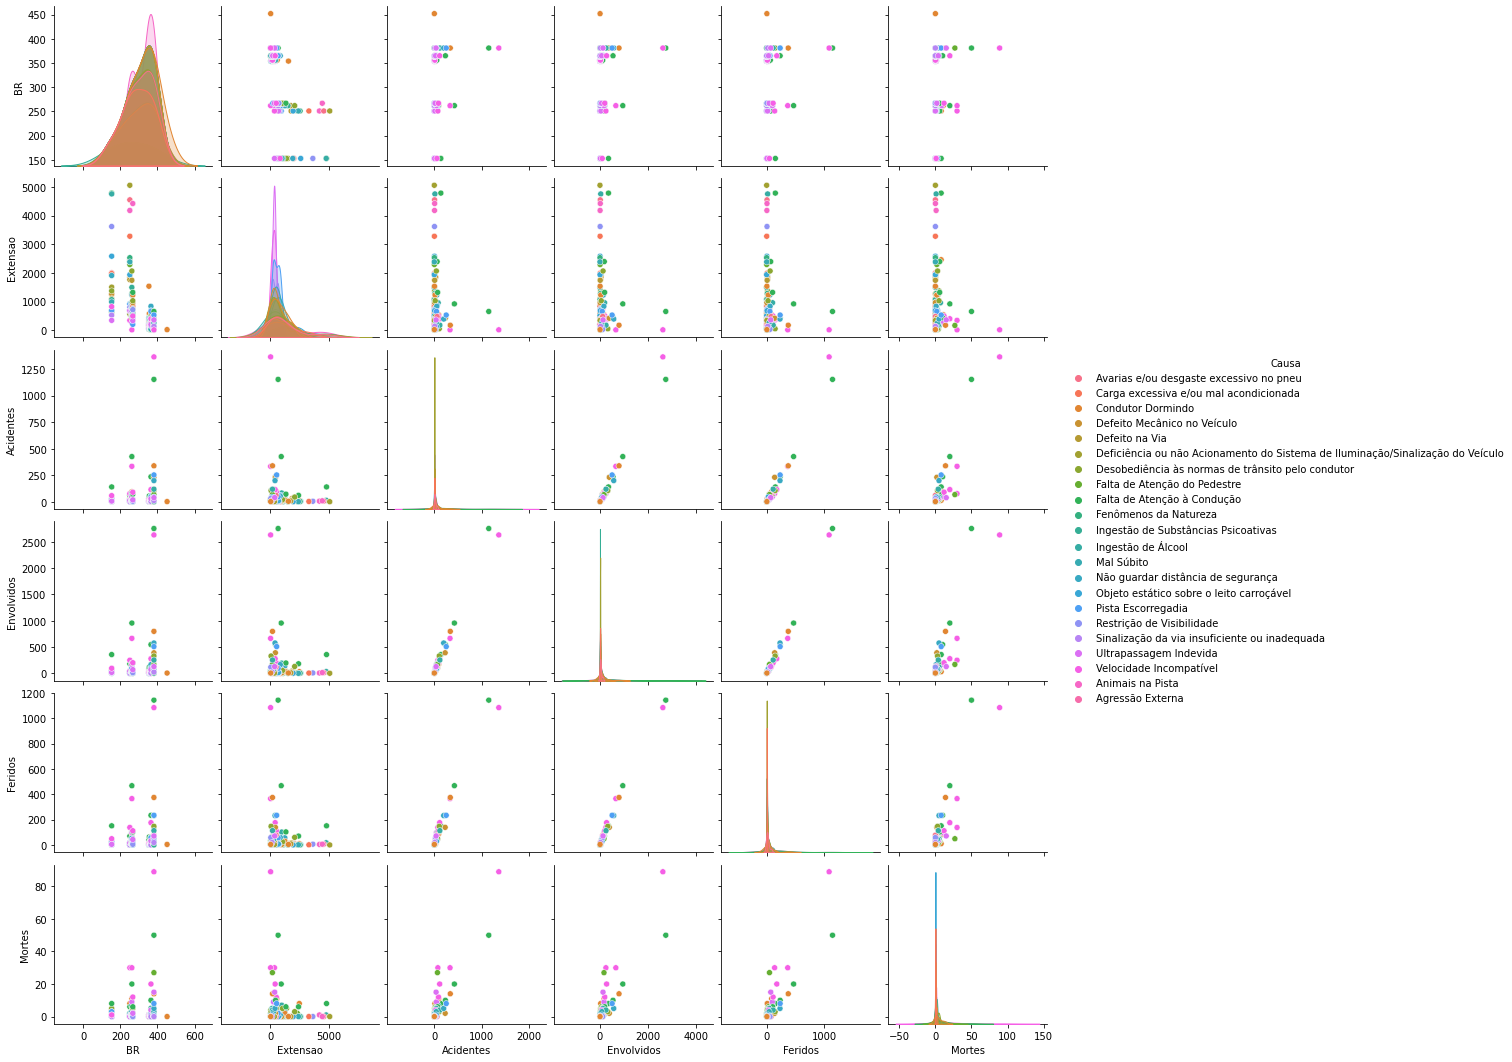

In [ ]:
sb.pairplot(data_2019,hue='Causa')

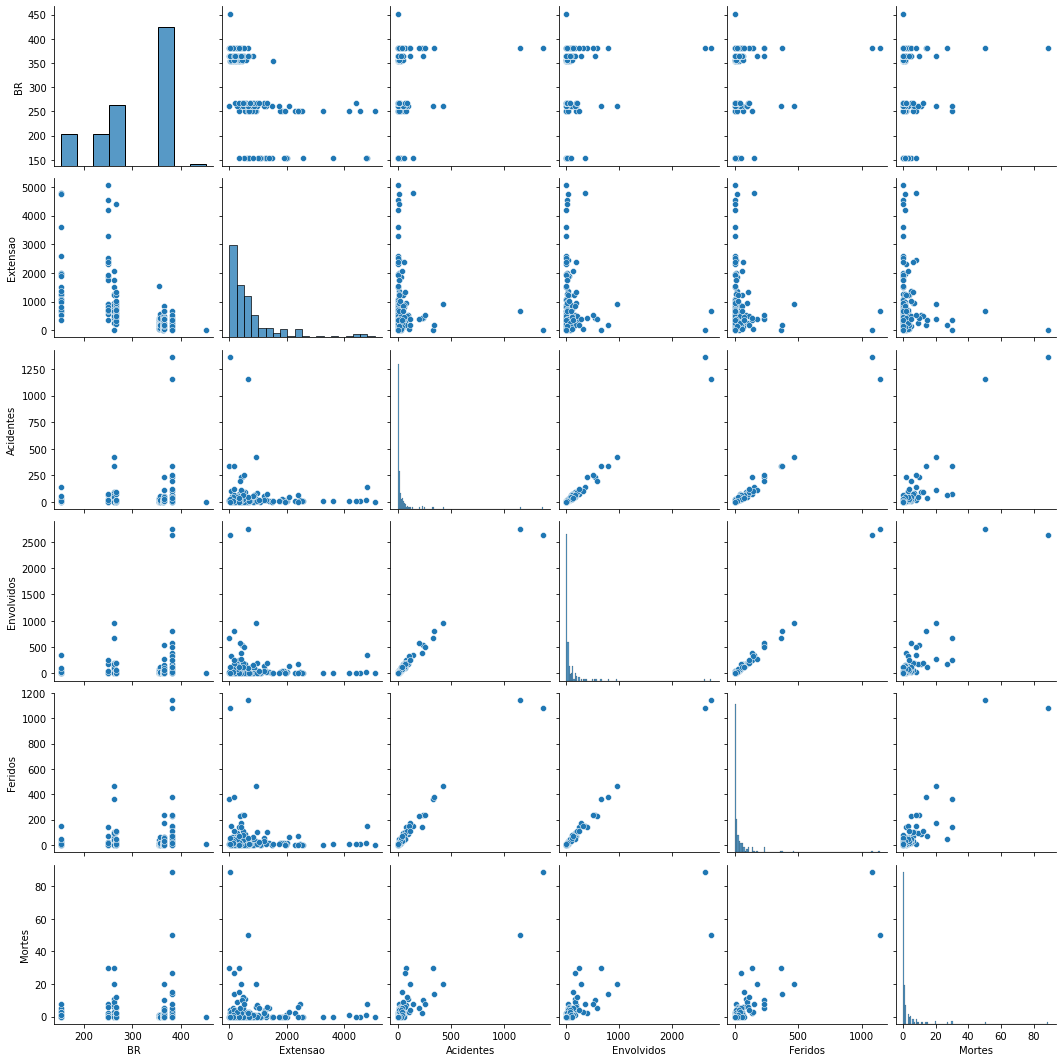

In [ ]:
sb.pairplot(data_2019)

In [ ]:
A19 = np.array(data_2019.drop('Causa', 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
A19

array([['2019', 153, 2002.1, ..., 24, 15, 0],
       ['2019', 153, 1977.2, ..., 6, 3, 1],
       ['2019', 153, 1240.6, ..., 59, 29, 4],
       ...,
       ['2019', 381, 361.1, ..., 129, 71, 15],
       ['2019', 381, 14.2, ..., 2630, 1085, 89],
       ['2019', 452, 20.8, ..., 6, 4, 0]], dtype=object)

In [ ]:
kmeansAno2019 = KMeans(n_clusters=5, random_state=0)
kmeansAno2019.fit(A19)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeansAno2019.labels_

array([0, 0, 3, 3, 3, 0, 3, 3, 2, 3, 3, 2, 3, 0, 0, 3, 2, 3, 1, 3, 2, 2,
       2, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1], dtype=int32)

In [ ]:
#COMPARANDO AS CLASSES CRIADAS COM AS CLASSES EXISTENTES
data_2019['K-classes'] = kmeansAno2019.labels_

In [ ]:
data_2019

Ano                                              Causa   BR  Extensao  Acidentes  Envolvidos  Feridos  Mortes  K-classes
0    2019            Avarias e/ou desgaste excessivo no pneu  153    2002.1         10          24       15       0          0
1    2019             Carga excessiva e/ou mal acondicionada  153    1977.2          3           6        3       1          0
2    2019                                  Condutor Dormindo  153    1240.6         31          59       29       4          3
3    2019                        Defeito Mecânico no Veículo  153    1268.8         20          39       15       0          3
4    2019                                     Defeito na Via  153    1099.2          4           4        1       0          3
5    2019  Deficiência ou não Acionamento do Sistema de I...  153    1503.7          3           7        1       0          0
6    2019  Desobediência às normas de trânsito pelo condutor  153    1372.5          9          32       16       5          3
7    2019                       Falta de Atenção do Pedestre  153     629.4          8          21        6       3          3
8    2019                        Falta de Atenção à Condução  153    4783.3        140         357      151       8          2
9    2019                              Fenômenos da Natureza  153     676.0          1           5        0       0          3
10   2019                Ingestão de Substâncias Psicoativas  153    1065.8          1           2        0       0          3
11   2019                                 Ingestão de Álcool  153    4753.5         14          34       17       1          2
12   2019                                         Mal Súbito  153     988.2          7          10        4       1          3
13   2019                 Não guardar distância de segurança  153    1907.9         17          48       12       0          0
14   2019           Objeto estático sobre o leito carroçável  153    2582.3          5           8        3       0          0
15   2019                                 Pista Escorregadia  153     693.3         24          45       24       3          3
16   2019                          Restrição de Visibilidade  153    3617.6          5           8        6       0          2
17   2019      Sinalização da via insuficiente ou inadequada  153     526.1          4          17        3       0          3
18   2019                             Ultrapassagem Indevida  153     344.4          7          19        5       1          1
19   2019                            Velocidade Incompatível  153     822.9         58          97       49       1          3
20   2019                                   Animais na Pista  251    4177.6          6           7        4       1          2
21   2019            Avarias e/ou desgaste excessivo no pneu  251    4547.6          7          14        6       0          2
22   2019             Carga excessiva e/ou mal acondicionada  251    3278.1          3           6        1       0          2
23   2019                                  Condutor Dormindo  251    2459.6         14          32       10       8          0
24   2019                        Defeito Mecânico no Veículo  251    1845.2         31          43       16       0          0
25   2019                                     Defeito na Via  251    1763.9         10          24       15       0          0
26   2019  Deficiência ou não Acionamento do Sistema de I...  251    5056.1          1           2        0       0          2
27   2019  Desobediência às normas de trânsito pelo condutor  251     563.7          8          25       14       0          3
28   2019                       Falta de Atenção do Pedestre  251    2292.8          3           7        1       2          0
29   2019                        Falta de Atenção à Condução  251    2394.3         61         182       70       6          0
30   2019                              Fenômenos da Natureza  251    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


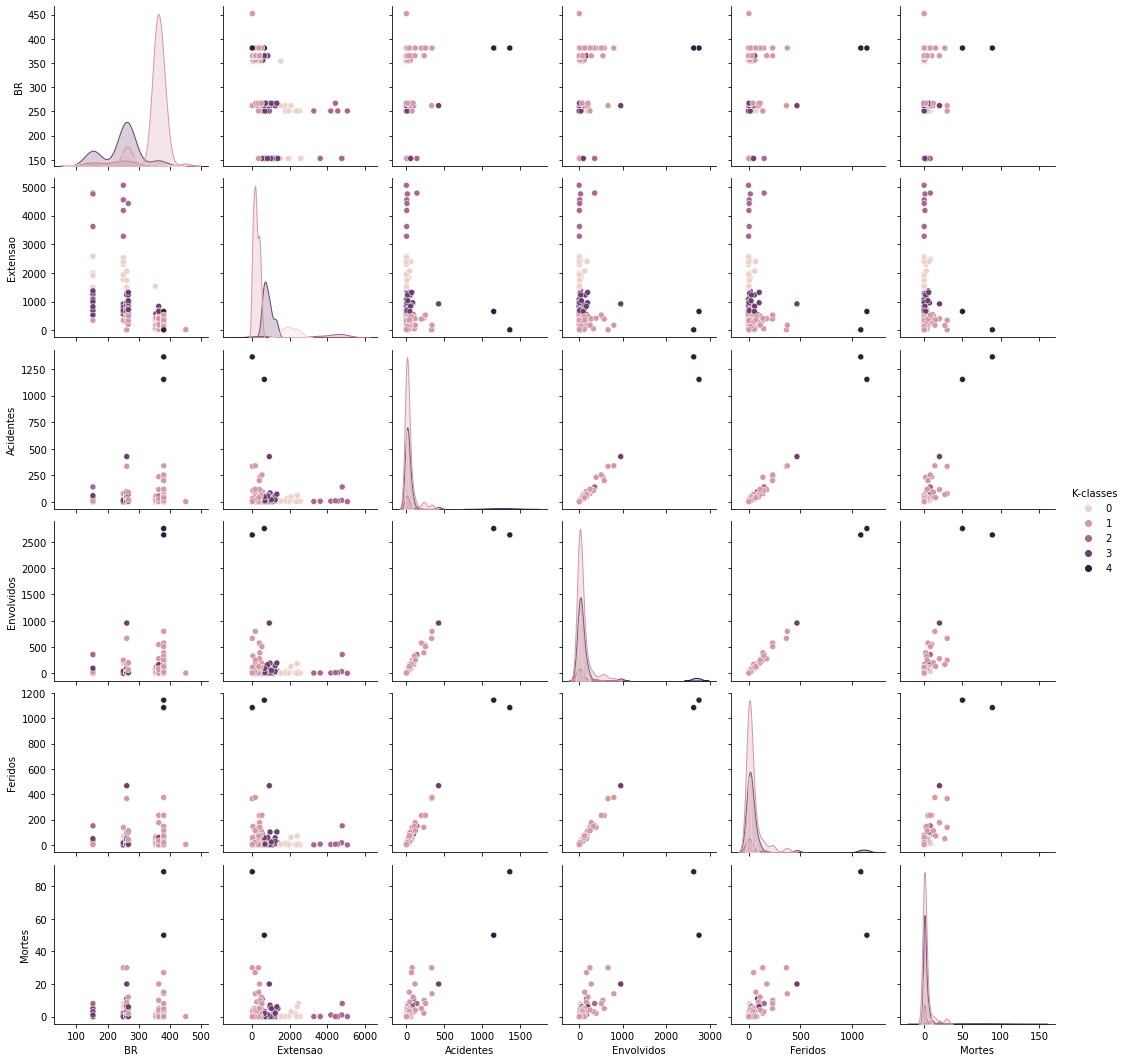

In [ ]:
sb.pairplot(data_2019,'K-classes')

#Aprendizagem por Ano - 2020

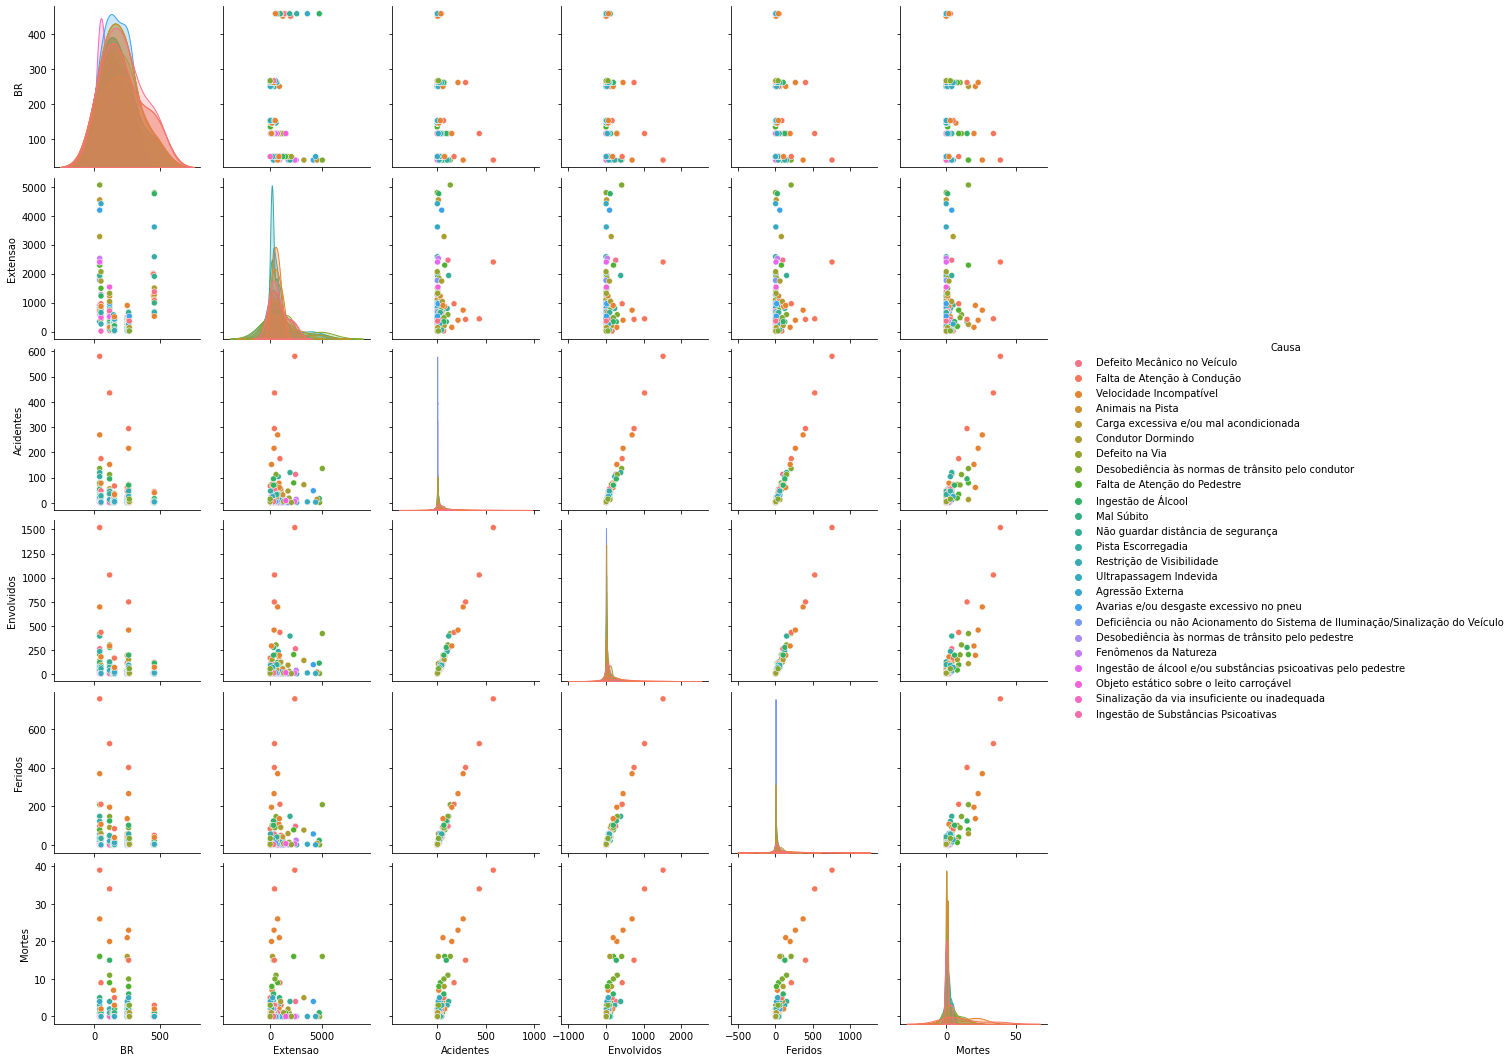

In [ ]:
sb.pairplot(data_2020,hue='Causa')

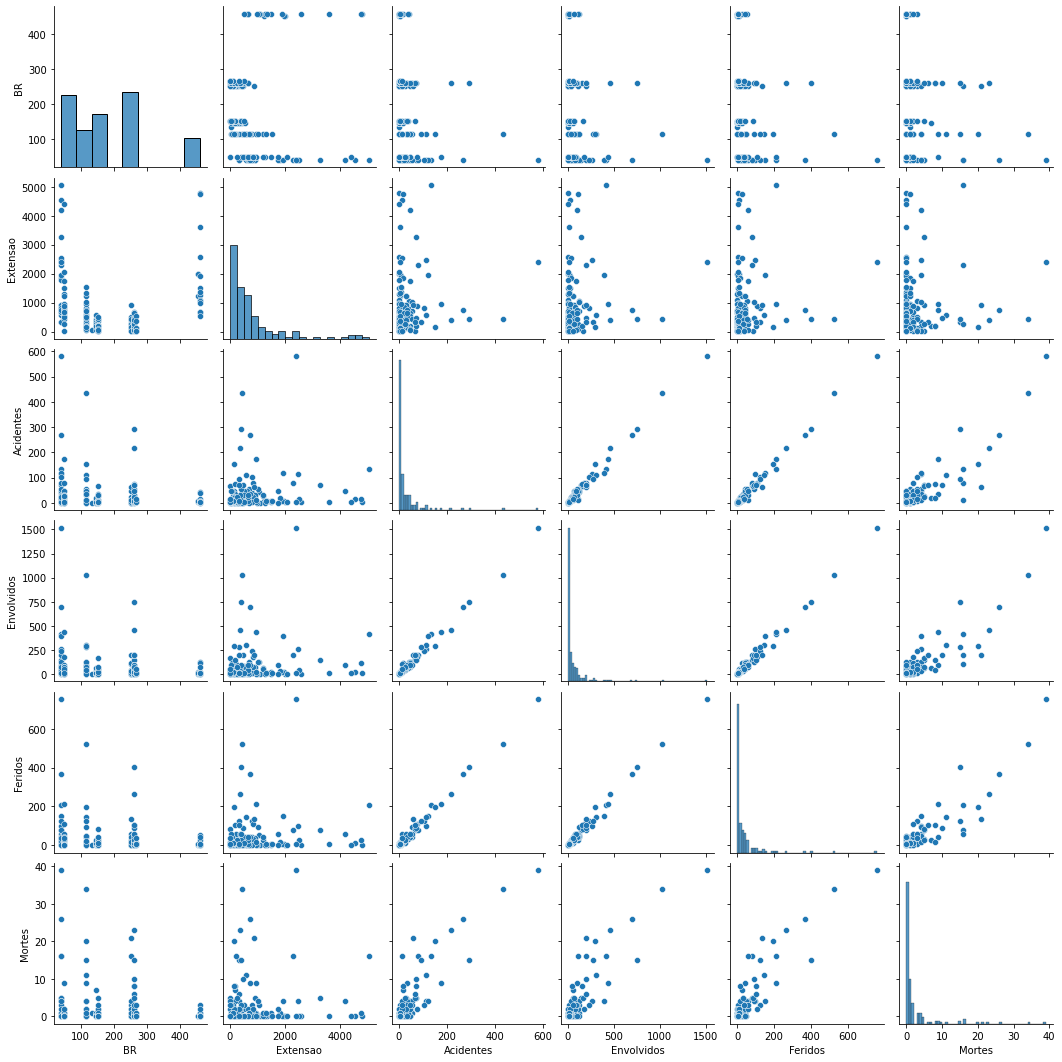

In [ ]:
sb.pairplot(data_2020)

In [ ]:
A20 = np.array(data_2020.drop('Causa', 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
A20

array([['2020', 452, 2003.3, ..., 2, 1, 0],
       ['2020', 452, 1977.2, ..., 16, 8, 0],
       ['2020', 452, 1241.0, ..., 9, 7, 0],
       ...,
       ['2020', 267, 361.1, ..., 10, 4, 0],
       ['2020', 267, 14.2, ..., 9, 5, 0],
       ['2020', 267, 20.8, ..., 55, 35, 3]], dtype=object)

In [ ]:
kmeansAno2020 = KMeans(n_clusters=5, random_state=0)
kmeansAno2020.fit(A20)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeansAno2020.labels_

array([4, 4, 0, 0, 0, 0, 0, 3, 2, 3, 0, 2, 0, 4, 4, 3, 2, 3, 1, 3, 2, 2,
       4, 4, 0, 0, 2, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 0, 3, 4, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 1, 1, 2, 3, 3, 0, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
#COMPARANDO AS CLASSES CRIADAS COM AS CLASSES EXISTENTES
data_2020['K-classes'] = kmeansAno2020.labels_

In [ ]:
data_2020

Ano                                              Causa   BR  Extensao  Acidentes  Envolvidos  Feridos  Mortes  K-classes
0    2020                        Defeito Mecânico no Veículo  452   2003.30          2           2        1       0          4
1    2020                        Falta de Atenção à Condução  452   1977.20          7          16        8       0          4
2    2020                            Velocidade Incompatível  452   1241.00          6           9        7       0          0
3    2020                                   Animais na Pista  459   1268.80          5           8        2       1          0
4    2020             Carga excessiva e/ou mal acondicionada  459   1099.40          1           1        0       0          0
5    2020                                  Condutor Dormindo  459   1503.70          2           3        3       0          0
6    2020                        Defeito Mecânico no Veículo  459   1372.50          8           9        2       0          0
7    2020                                     Defeito na Via  459    629.40          2           2        1       0          3
8    2020  Desobediência às normas de trânsito pelo condutor  459   4797.70          2           6        2       0          2
9    2020                       Falta de Atenção do Pedestre  459    684.30          5          11        6       0          3
10   2020                        Falta de Atenção à Condução  459   1065.80         45         121       51       3          0
11   2020                                 Ingestão de Álcool  459   4760.63         17         113       25       1          2
12   2020                                         Mal Súbito  459    988.20          1           2        2       0          0
13   2020                 Não guardar distância de segurança  459   1904.80          8          20        6       0          4
14   2020                                 Pista Escorregadia  459   2582.30          2           2        2       0          4
15   2020                          Restrição de Visibilidade  459    664.20          3           6        3       0          3
16   2020                             Ultrapassagem Indevida  459   3611.24          4          11        5       0          2
17   2020                            Velocidade Incompatível  459    526.30         40          70       40       2          3
18   2020                                   Agressão Externa   40    344.40         11          23       13       0          1
19   2020                                   Animais na Pista   40    828.50         41          70       41       0          3
20   2020            Avarias e/ou desgaste excessivo no pneu   40   4192.00         48          97       58       4          2
21   2020             Carga excessiva e/ou mal acondicionada   40   4547.60         14          21       10       0          2
22   2020                                  Condutor Dormindo   40   3279.00         72         141       78       5          4
23   2020                        Defeito Mecânico no Veículo   40   2465.00        113         262       98       4          4
24   2020                                     Defeito na Via   40   1844.10         19          29       15       1          0
25   2020  Deficiência ou não Acionamento do Sistema de I...   40   1763.92          1           2        2       0          0
26   2020  Desobediência às normas de trânsito pelo condutor   40   5060.50        136         420      209      16          2
27   2020  Desobediência às normas de trânsito pelo pedestre   40    583.60          6          16        5       0          3
28   2020                       Falta de Atenção do Pedestre   40   2292.80         79         202       79      16          4
29   2020                        Falta de Atenção à Condução   40   2400.00        580        1520      755      39          4
30   2020                              Fenômenos da Natureza   40   2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


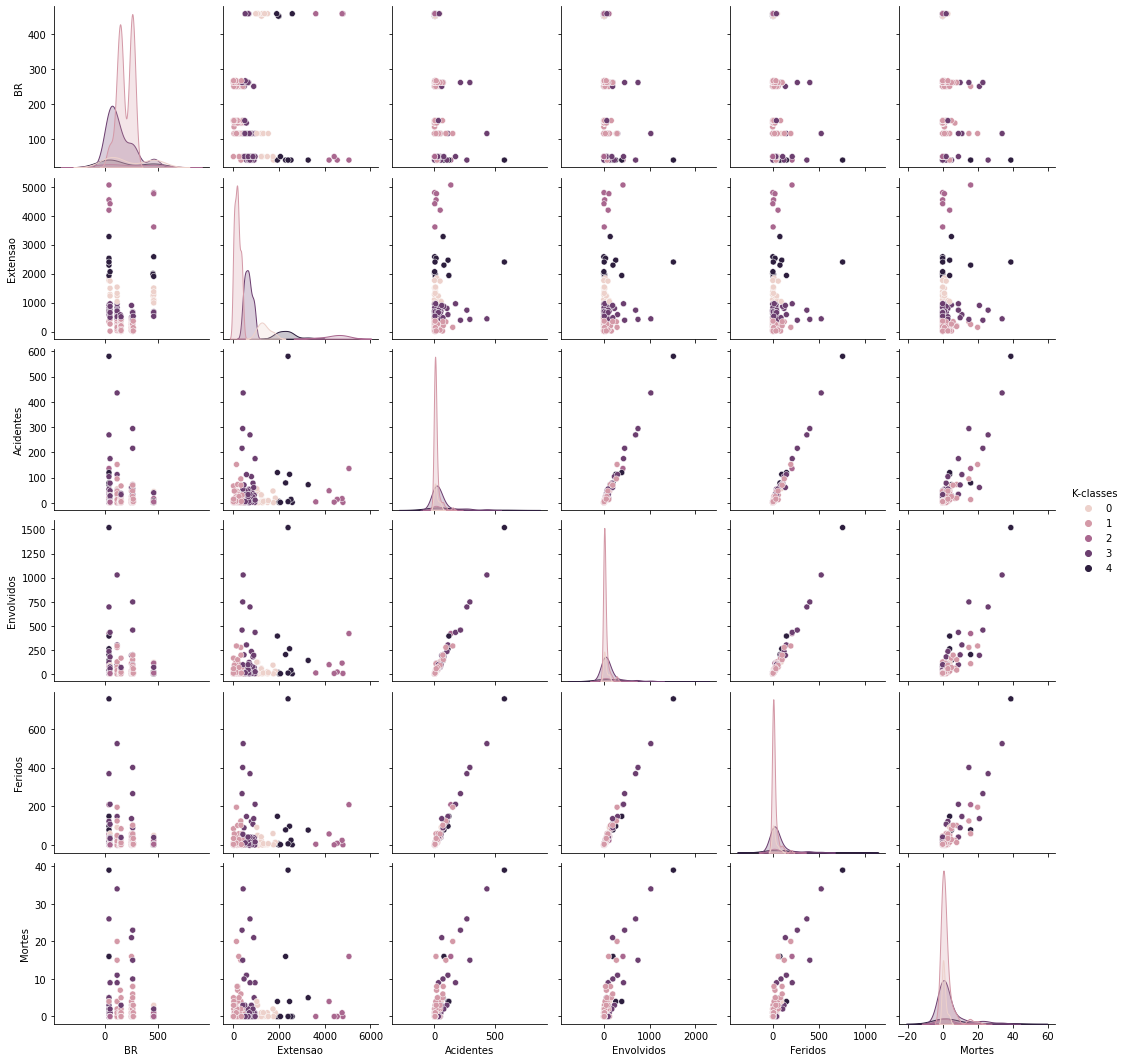

In [ ]:
sb.pairplot(data_2020,'K-classes')

#Aprendizagem por Ano - 2021

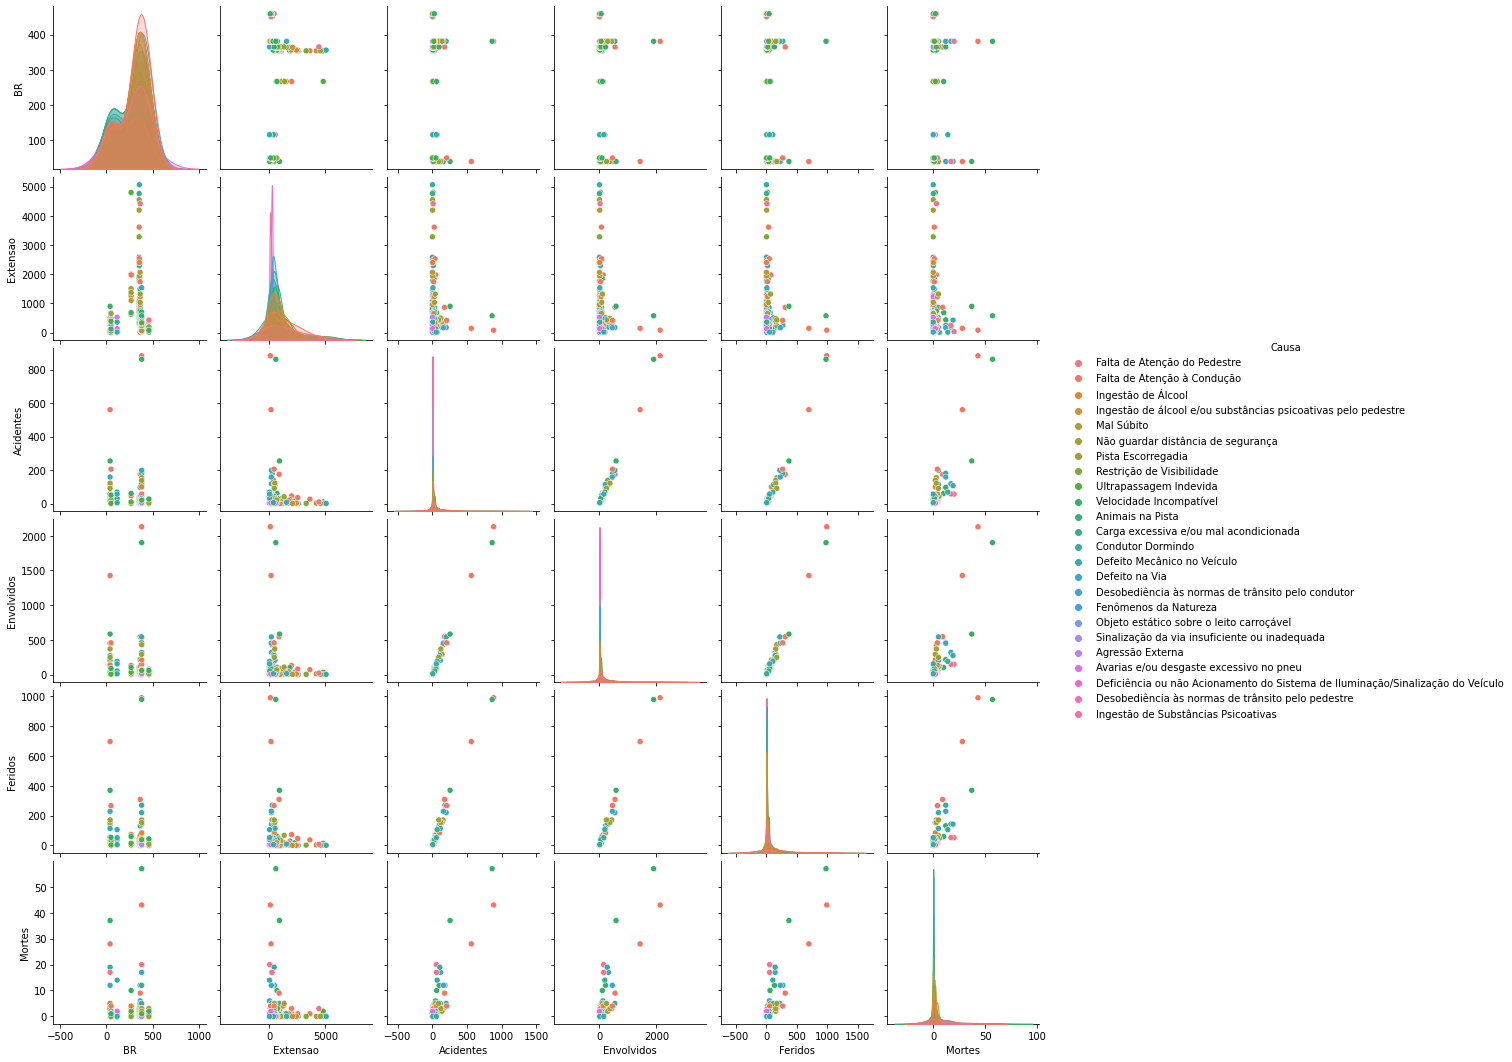

In [ ]:
sb.pairplot(data_2021,hue='Causa')

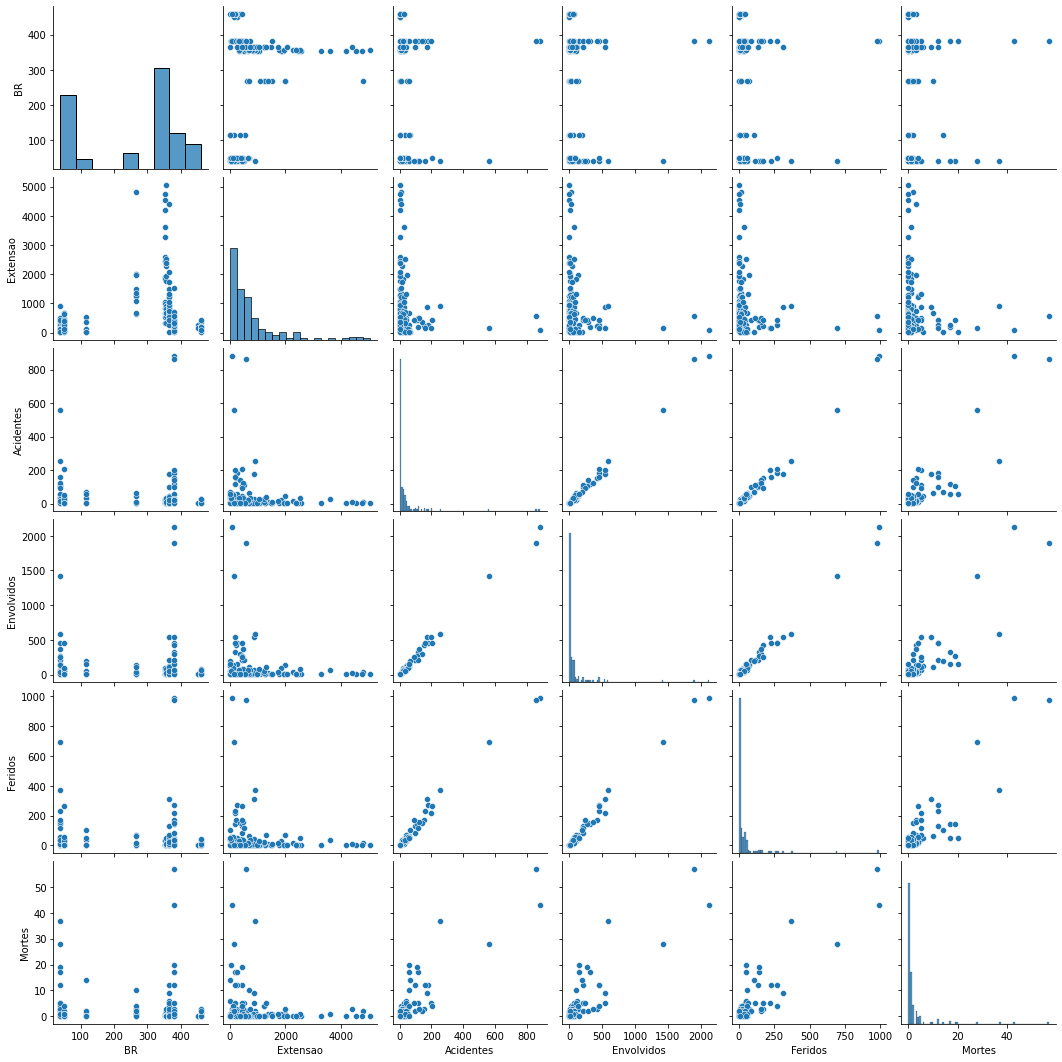

In [ ]:
sb.pairplot(data_2021)

In [ ]:
A21 = np.array(data_2021.drop('Causa', 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
A21

array([['2021', 267, 2003.3, ..., 6, 3, 1],
       ['2021', 267, 1977.2, ..., 131, 73, 3],
       ['2021', 267, 1241.0, ..., 26, 15, 4],
       ...,
       ['2021', 116, 361.1, ..., 12, 6, 0],
       ['2021', 116, 14.2, ..., 189, 106, 14],
       ['2021', 116, 20.8, ..., 153, 52, 0]], dtype=object)

In [ ]:
kmeansAno2021 = KMeans(n_clusters=5, random_state=0)
kmeansAno2021.fit(A21)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeansAno2021.labels_

array([0, 0, 3, 3, 3, 0, 3, 3, 2, 3, 3, 2, 3, 0, 0, 3, 2, 3, 1, 3, 2, 2,
       2, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
#COMPARANDO AS CLASSES CRIADAS COM AS CLASSES EXISTENTES
data_2021['K-classes'] = kmeansAno2021.labels_

In [ ]:
data_2021

Ano                                              Causa   BR  Extensao  Acidentes  Envolvidos  Feridos  Mortes  K-classes
0    2021                       Falta de Atenção do Pedestre  267   2003.30          3           6        3       1          0
1    2021                        Falta de Atenção à Condução  267   1977.20         46         131       73       3          0
2    2021                                 Ingestão de Álcool  267   1241.00          9          26       15       4          3
3    2021  Ingestão de álcool e/ou substâncias psicoativa...  267   1268.80          2           3        2       0          3
4    2021                                         Mal Súbito  267   1099.40          1           1        1       0          3
5    2021                 Não guardar distância de segurança  267   1503.70          4          12        3       1          0
6    2021                                 Pista Escorregadia  267   1372.50          8          20       12       1          3
7    2021                          Restrição de Visibilidade  267    629.40          2           9        3       0          3
8    2021                             Ultrapassagem Indevida  267   4797.70         10          33       14       2          2
9    2021                            Velocidade Incompatível  267    684.30         61         102       60      10          3
10   2021                                   Animais na Pista  354   1065.80          4          16        6       0          3
11   2021             Carga excessiva e/ou mal acondicionada  354   4760.63          3           3        2       0          2
12   2021                                  Condutor Dormindo  354    988.20          3           4        2       0          3
13   2021                        Defeito Mecânico no Veículo  354   1904.80          6          14        2       0          0
14   2021                                     Defeito na Via  354   2582.30          1           1        1       0          0
15   2021  Desobediência às normas de trânsito pelo condutor  354    664.20          2           7        3       0          3
16   2021                        Falta de Atenção à Condução  354   3611.24         27          70       37       1          2
17   2021                              Fenômenos da Natureza  354    526.30          1           3        1       0          3
18   2021                                 Ingestão de Álcool  354    344.40          5          12        4       0          1
19   2021                                         Mal Súbito  354    828.50          3           7        1       0          3
20   2021                 Não guardar distância de segurança  354   4192.00          3          10        4       0          2
21   2021                                 Pista Escorregadia  354   4547.60          2           3        2       0          2
22   2021                          Restrição de Visibilidade  354   3279.00          1           2        2       0          2
23   2021                             Ultrapassagem Indevida  354   2465.00          2           7        3       0          0
24   2021                            Velocidade Incompatível  354   1844.10         24         101       29       1          0
25   2021                                   Animais na Pista  356   1763.92          3           6        3       0          0
26   2021                                  Condutor Dormindo  356   5060.50          1           1        1       0          2
27   2021                        Defeito Mecânico no Veículo  356    583.60          1           1        1       0          3
28   2021  Desobediência às normas de trânsito pelo condutor  356   2292.80         13          35       19       0          0
29   2021                       Falta de Atenção do Pedestre  356   2400.00          1           2        1       0          0
30   2021                        Falta de Atenção à Condução  356   2

In [ ]:
sb.pairplot(data_2021,'K-classes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
